<div align="center"> 
    
# GBM8378 - Principes d'imagerie biomédicale - Hiver 2021
## Laboratoire 3 - Imagerie par Résonance Magnétique
<br>
    
**Prénom1 Nom1 - Matricule1**  
**Prénom2 Nom2 - Matricule2**
    
</div> 

<div align="center" class="alert alert-block alert-danger">
    <b>Assurez vous d'avoir indiqué vos noms et matricules dans la cellule précédente.</b>
</div>

<div class="alert alert-block alert-danger">
<b>
Avant de commencer à répondre au différentes questions, veuillez vérifier que le Jupyter Notebook fonctionne correctement:
    <br>
    <br>
    1. Redémarrez le noyau (dans la barre de menu : "Kernel" $\rightarrow$ "Restart")
    <br>
    2. Lancez toutes les cellules (dans la barre de menu :  "Cell" $\rightarrow$ "Run All").
</b>
</div>

# <font color='coral'> Travail à effectuer </font>

<div class="alert alert-block alert-info">
<b>Remplissez toutes les sections "Ajoutez votre code ici" et "Double-cliquez pour entrez votre réponse".</b>
</div>

In [10]:
import copy
import nibabel as nib
import pydicom as pycd
import matplotlib.pyplot as plt
import math
import nilearn.plotting as nip;
import numpy as np
import dicom
from numpy.fft import *
from numpy.matlib import *
from numpy import matlib as mb
from niwidgets import NiftiWidget

%matplotlib inline

## Partie I : Concepts d'imagerie

<div class="alert alert-block alert-info">  

#### 1. Lecture de l’image DICOM

Les images issues du système IRM sont sous format DICOM (extension .dcm). DICOM est un standard de fichier en imagerie médicale (pas seulement pour l'IRM, mais aussi pour le PET, CT, US, etc.). Les fichiers DICOM incluent un header qui contient des informations ou "metadata" sur l'acquisition des images (e.g., date de l'examen, modèle d'IRM, TR, TE, flip angle, position des slices, etc.), suivi de l'image encodée en binaire. Une image 3D est sauvegardée sous plusieurs tranches, i.e. plusieurs fichiers DICOM.
    
Ci-dessous, nous analyserons le contenu du fichier DICOM <code>FourierTransform_Test01-03-0011.dcm</code>, notamment nous afficherons l'image et nous analyserons quelques champs des metadata.
</div>

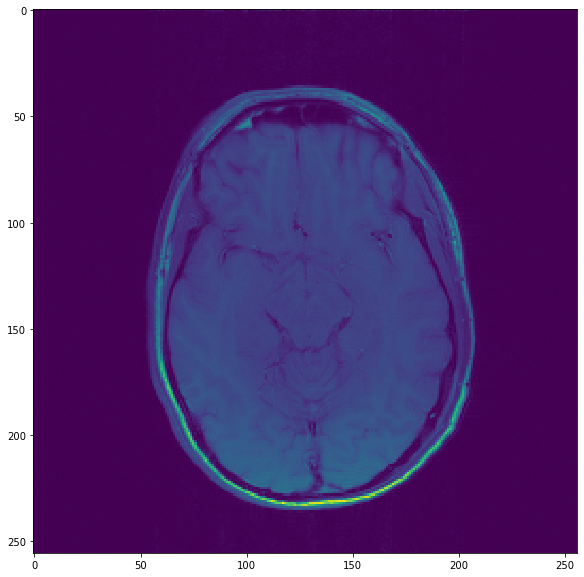

In [3]:
# La ligne ci-dessous sert à lire l'image DICOM et à la mettre dans la variable dcm
dcm = dicom.read_file('dicom/FourierTransform_Test01-03-0011.dcm', force=True)

# L'attribut "pixel_array" sert à récupérer l'image (i.e. matrice 2d)
image = dcm.pixel_array

# Afficher l'image
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

<div class="alert alert-block alert-warning">

A) Quelle est la largeur de la coupe (en z) ? Quelle est l'unité ? 1pt
    
Pour afficher le contenu d'une variable en Python, vous pouvez utiliser la fonction <code>print(dcm)</code>. 
    
Sélectionner ensuite le champ pertinent : <code>dcm.CHAMP</code>

<b>ATTENTION:</b> Les espaces doivent être enlevés pour appeler le champ. Exemple: <code>"Study Date" --> dcm.StudyDate</code>
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">

B) Étant donné que nous imageons des protons 1H et que le champ est 3 teslas, estimez
approximativement la valeur du gradient magnétique qui est imposé en z pour former une
tranche de cette largeur si nous supposons que la largeur de bande de l’impulsion RF est
de 1 kHz. 

2pts
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
    
#### 2. Analyse de Fourier <br>
Rappelons que le signal acquis en IRM est en fait la transformée de Fourier de l’image (voir les équations 13.46 et 13.47 du livre de Prince & Links). L’image du cerveau qu’on affiche est donc la transformée inverse des données.<br>
    
Le code ci-dessous permet d'ouvrir l'image de phase et d'afficher l'image de magnitude et de phase. Voir la <a href="https://matplotlib.org/">documentation</a> pour plus d'informations.
</div>

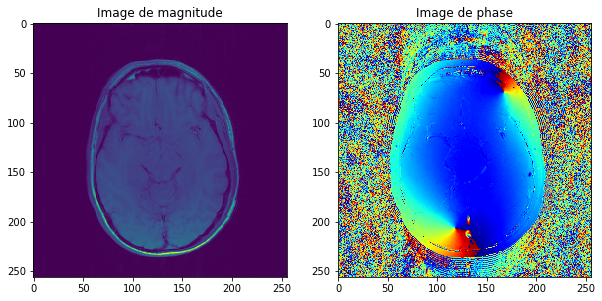

In [4]:
# On ouvre l'image de phase
dcm_phase = dicom.read_file('dicom/FourierTransform_Test01-04-0011.dcm', force=True)
image_phase = dcm_phase.pixel_array

#  Display. Le package utilisé est matplotlib.pyplot qui a été importé en tant que plt. Nous appelons donc les fonction plt.fonction
plt.figure(figsize = (10, 10))  # plt.figure permet de décrire l'image. "figsize" détermine la taille de la figure.
plt.subplot(1, 2, 1)  # Permet de créer un subplot. La numerotation est la suivante (nb_colonne,nb_lignes,index) 
# L'indexation commence a 1 et va de gauche a droite et de haut en bas. 
plt.imshow(image)  # Permet d'afficher une image
plt.title('Image de magnitude')  # Le titre s'applique a l'objet subplot, en l'occurence le dernier existant. 
plt.subplot(1, 2, 2)
plt.imshow(image_phase, cmap="jet")
plt.title('Image de phase');

<div class="alert alert-block alert-info">
Les limitations d’acquisition liées au phénomène de Nyquist s’opèrent ici dans l’espace
des fréquences spatiales. Pour étudier ce phénomène suivez les instructions ci dessous :<br>
● Faites la transformée de Fourier 2D (fonction <code>fft2</code>) de l’image de magnitude <code>FourierTransform_Test01-03-0011.dcm</code>.<br>
● Sous-échantillonnez cette transformée par un facteur 2 selon les deux axes (u et v).
Pour conserver la taille de la matrice (256x256), remplacer un élément sur deux par des 0. Au final, vous devez avoir conservé la moitié des valeurs de la FFT originale.<br>   
● Faites la transformée inverse.<br>
</div>

<div class="alert alert-block alert-warning">
2.2. Illustrez l’image ainsi obtenue. Comparez-la avec l’image originale. Expliquez le
phénomène observé et sa cause. 

3pts
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-warning">
Recommencez avec l’image originale :

- Faites sa transformée de Fourier 2D.

- Sous-échantillonnez cette transformée par un facteur 2 selon les deux axes (u et v).
Cette fois-ci, retirez un élément sur deux (en u et v, donc 1 ligne sur 2 et 1 colonne
sur 2). Vous diminuerez donc de moitié la taille de votre matrice dans chaque
dimension.

- Faites la transformée inverse.

Illustrez l’image ainsi obtenue. Comparez-la avec l’image originale et avec
l’image reconstruite à la question 2.2. Expliquez les différences observées. 3pts
  </div>

<div class="alert alert-block alert-danger">
Pour faire cela regardez les possibilités de <code>slicing</code> en Python. ce <a href="https://dev.to/duomly/what-is-slicing-in-python-58f2">tutorial</a> vous permettra de voir les bases. Cependant vous êtes encouragé à chercher sur internet.
Il est également possible de proposer une version plus algorithmique.
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
2.3. Comment l’acquisition dans l’espace Fourier affecte la résolution spatiale de l'image ? Décrire l'équation qui régit la résolution spatiale en fonction des paramètres d'instrumentation de l'IRM. Quelles sont les contraintes d'instrumentation et de sécurité/confort du patient qui limitent la résolution spatiale ? 

3pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
  
#### 3. Artéfacts
Cette section a pour but de vous faire simuler 2 artéfacts qui peuvent survenir de manière assez
fréquente lors de l’acquisition d’une image par résonance magnétique : artefact de « spiking » et artefact de mouvement.<br></div>
<div class="alert alert-block alert-warning">
3.1.1. <b>Artefact de Spiking</b>. Décrivez une procédure permettant de simuler un artéfact « spiking » à partir d’une image déjà reconstruite. Comment cet artéfact affecte-t-il l’image finale ? 

1.5pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
    3.1.2. Implémentez cette procédure en utilisant <code>FourierTransform_Test01-03-0011.dcm</code> et simulez trois types de spiking artefacts : horizontal, vertical et oblique.  1.5pts
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-info">
3.2.1. <b>Artefact de mouvement</b>. Toujours à partir de la même image, observez l'effet d'un mouvement de l'image sur sa transformée de Fourier :
    
- Décalez votre image de 10 pixels (fonction <code>np.roll</code> dont vous trouverez la documentation <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html'>ici</a>).
- Calculez le k-space de l’image originale et de l’image décalée
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-warning">
Observez-vous une différence sur la magnitude du k-space? Sur la phase du
k-space? Commentez (indiquez aussi pourquoi la phase du k-space est en « arc
en ciel »).

2pts
    </div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
3.2.2. Décrivez une procédure permettant de simuler un artéfact correspondant à un
mouvement global du patient en cours d’acquisition. 

1pt
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
  3.2.3. Implémentez cette procédure pour un mouvement de 10 pixels dans la direction de votre
choix. Considérez deux cas : (i) la deuxième moitié du k-space est affectée par le
mouvement et (ii) une ligne du k-space sur deux est affectée par le mouvement.<br>
Expliquez vos résultats.

2pts
    </div>


In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## Partie II : IRM anatomique

<div class="alert alert-block alert-info">
    
#### 4. Étude de l'image anatomique 
D'autres formats d'images sont souvent utilisés en IRM, par exemple le format NIfTI (.nii).

Chargez l’image anatomique <code>anat/mprage.nii.gz</code> en utilisant <code>nib.load</code>.<br> 
</div>

In [ ]:
nii = nib.load('anat/mprage.nii.gz')

<div class="alert alert-block alert-warning">

4.1. Il s’agit d’une image à 3 dimensions. Quelle est le nombre de voxels dans chacune des
dimensions ? Quelle est la taille de chaque voxel (en mm) ? Indice : regarder la
structure de pixdim dans nii.header 

1pt
    </div>

<div class="alert alert-block alert-danger">
<code>nib.load</code> renvoie un <b>objet</b> nifti constitué d'un header et de l'image. Utilisez <code>objet.header</code> pour acceder au header et <code>object.dataobj</code> pour acceder au données d'image.
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
Visualisez l’image à l'aide de la cellule ci-dessous. Cette image a été prise avec une séquence 3D de type
écho de gradient (gradient echo). Le TR est très faible (inférieur à 10ms), il s’agit donc d’une image pondérée en T1. Un pulse d’inversion-récupération prépare les spins afin d’augmenter le contraste entre les tissus
(suppression du liquide cérébrospinal). Le nom de cette séquence est « MPRAGE ».
</div>

<div class="alert alert-block alert-warning">
4.2. Faites une capture d'écran (screenshot) de la vue axiale (seulement la vue axiale).
Quelle est cette structure noire située aux coordonnées (-10, -22, 28) ? Quelle stratégie
a permis d’annuler le signal pour cette structure ? 2pts<br>
    </div>

<div class="alert alert-block alert-danger">
Vous pouvez vous deplacer sur l'image à l'aide de la souris.
En cas de problème avec le viewer (l'image apparait hachée), cliquez sur une des vues correctes et cela reviendra à la normale.
</div>

In [ ]:
# Visualiser l'image en utilisant nilearn plotting
nip.view_img(nii, cut_coords=[0, 0, 0], title="anatomical image", cmap="gray", symmetric_cmap=False, bg_black=True, bg_image=False)

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
4.3. A quoi correspond le petit blob gris aux coordonnées (56,68,28) ? 

2pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
4.4. Observez la structure très brillante aux coordonnées (-2,-6,-14). Il s’agit de <a href="https://en.wikipedia.org/wiki/Basilar_artery">l’artère
basilaire</a>. Pourquoi le
signal de celle-ci n’a pas été supprimé comme en 4.2? 

2pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## Partie III : IRM fonctionnelle (IRMf ou fMRI)

<div class="alert alert-block alert-info">
    
#### 5. Étude des images fonctionnelles
Nous allons étudier l'image <code>fmri.nii</code>

La particularité de ce fichier est qu’il s’agit d’une image 4D (versus 3D pour l’image anatomique).
Les dimensions (x,y,z,t) de l’image sont : 64×64×21×180. Cela implique qu’il y a 180 volumes 3D,
un volume étant mesuré toutes les TR secondes. Ici, le temps de répétition TR = 3 secondes .
    
La séquence utilisée pour acquérir ces volumes est une séquence en écho de gradient, pondérée
en T2\*, utilisant la technique echo planar imaging (EPI). L’intérêt d’utiliser la technique EPI est
d’obtenir un volume du cerveau complet très rapidement. Ici, chaque volume est acquis en
seulement 3 secondes !! Par comparaison, le volume anatomique précédent a été acquis en 5
minutes. Bien sûr, la qualité d’image est moindre.
    
Affichons l'image.
</div>

In [ ]:
# Afficher l'image en utilisant NiftiWidget.nifti_plotter().
# Note: Utilisez les sliders pour vous déplacer. Une fois que vous avez cliqué sur un slider, vous pouvez utiliser
# les flèches gauche/droite pour bouger le slider.
fmri_widget = NiftiWidget('fmri/fmri.nii.gz')
fmri_widget.nifti_plotter(colormap='nipy_spectral', display_mode=['ortho', 'xz']);

<div class="alert alert-block alert-warning">
5.1.1 Comment se fait-il que le cerveau apparaisse "applati" dans la direction supérieure-inférieure ?
    
Astuce: Étudiez le header de l'image NIfTI en l'ouvrant avec nibabel.
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
5.1. Citez deux caractéristiques montrant que la qualité des images EPI est inférieure à celle
de l’image anatomique. Vous pouvez par exemple comparer l’image anatomique avec
celle d'EPI et montrer la présence d’artefacts (préciser le type d’artefact). 

3pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
L’utilité d’acquérir autant de volumes à la suite est de tester la présence d’une activité neuronale
lorsqu’une tâche motrice, sensorielle ou cognitive est effectuée par le sujet pendant l’acquisition.
Cette expérience s’appelle IRM fonctionnelle. La beauté de cette technique est qu’elle permet
de localiser spatialement l’origine de l’activité neuronale. La précision de cette localisation
dépend donc de la résolution spatiale des volumes EPI (ici, 4×4×6 mm^3) ainsi que du couplage neurovasculaire.
    
La façon de procéder est la suivante. Pendant l’acquisition des nombreux volumes, le sujet est
soumis à une activité fonctionnelle (passive ou active). On appelle cette période « ON ». Durant
ces périodes, l'activation des neurones suscite un afflux sanguin qui influence le signal IRMf
localement, dans la région activée du cerveau. Afin de pouvoir discriminer l’impact des périodes
ON sur les images, il est important d’avoir aussi des périodes dites « OFF », pendant lesquelles
le sujet est au repos et ne subit aucune activité contrôlée. La succession des périodes ON et
OFF correspond au « paradigme » de l’expérience IRMf.    
</div>

<div class="alert alert-block alert-warning">
5.2. Comme mentionné plus haut, le paradigme IRMf est composé de N cycles "ON-OFF". La durée d'un cycle est de 90 secondes. Trouvez N.

1pt
    </div>


In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-warning">
5.3. Extraire le décours temporel ( time course ) des voxels suivants :

    [34,34,18]
    [26,14,8]
    [34,34,13]
    [44,26,9]
    [30,52,10]
    [44,18,11]
    
Afficher les décours sur le même plot. Ne pas oublier les unités. Quel est le voxel où
l’activité neuronale semble avoir lieu ?
2pts
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
Nous allons maintenant partir à la recherche de l’activité neuronale... Pour cela, nous souhaitons savoir de façon exhaustive où l’activité neuronale a eu lieu. Nous pourrions continuer la méthode d’identification comme réalisé en 5.2 pour tous les voxels du volume, mais cela reviendrait à identifier manuellement nx × ny × nz voxels, soit 86016 voxels !! Par ailleurs il serait souhaitable d’utiliser une approche davantage ​quantitative que celle utilisée précédemment, qui se basait sur notre jugement. Utilisons notre cerveau pour trouver une façon plus efficace d’étudier le cerveau !
Une approche communément utilisée est de construire une carte statistique qui teste, pour
chaque voxel, la correspondance temporelle entre le paradigme et le décours temporel. 
    
<br>
Une façon de faire est de moyenner le signal pendant la période ON et pendant la période OFF, puis
de faire la différence entre ces deux moyennes. Cette différence sera ensuite divisée par l’écart
type du signal. Cela revient à calculer le rapport contraste à bruit (CNR) de l’activité neuronale
pour chaque voxel .
     </div>

In [ ]:
# On charge le fichier et on récupère les données images
nii_fmri = nib.load('fmri/fmri.nii.gz')
image_fmri = np.array(nii_fmri.dataobj)
# On moyenne sur la 4e dimension (le temps)
data_mean = np.mean(image_fmri, axis=3)
# On crée un nouvel objet nibabel
nii_mean = nib.Nifti1Image(data_mean, np.eye(4), header=nii_fmri.header)
# On sauvegarde en fichier NIfTI
nib.save(nii_mean, 'fmri/fmri_mean.nii')
nip.view_img(nii_mean, cut_coords=[32, 26, 12], title="fmri mean", cmap='gray', symmetric_cmap=False, bg_img=False, black_bg=True)

<div class="alert alert-block alert-warning">
5.4. Calculez une carte (valeur à chaque voxel) de CNR de l’activité neuronale et sauvegardez cette carte en fichier NIfTI.
    
3pts
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.
# Astuce: Pour sauvegarder votre carte de CNR, utilisez: 
# >> nii_cnr = nib.Nifti1Image(abs(CNR_map), np.eye(4), header=nii_fmri.header)
# >> nib.save(nii_cnr, 'fmri/CNR_map.nii')

<div class="alert alert-block alert-warning">
5.5. Afficher la carte de CNR en superposition de l'EPI moyenne.
    
2pts
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.
# Astuce: Pour afficher deux images en superposition, utilisez:
# >> nip.view_img(PATH_TO_FOREGROUND_IMAGE, threshold=1.5, cut_coords=[33, 33, 14], title="CNR overlaid on fMRI", cmap="OrRd", bg_img=PATH_TO_BACKGROUND_IMAGE, symmetric_cmap=False, black_bg=True)

<div class="alert alert-block alert-warning">
5.6. On peut considérer que les changements hémodynamiques induits par l’activité neuronale sont étalés sur plusieurs voxels voisins. Décrire une méthode permettant d’augmenter le CNR pour détecter l’activité neuronale (2 lignes max).
    
2pts
    </div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-info">
Le cortex est organisé en régions topologiques fonctionnelles, i.e., une zone corticale correspond à une fonction. Par exemple le lobe temporal situé en arrière du cerveau sera responsable de la mémoire, alors que le lobe pariétal sera responsable de l’activité motrice, etc. Historiquement, le «mapping» des fonctions corticales avait commencé avec Wilfried Penfield, au <b>Montreal Neurological Institute</b>. Alors qu’il étudiait des patients épileptiques avec des électrodes implantées, Dr. Penfield a pu identifier la localisation des aires somato-sensorielles. Dr. Brodmann a poursuivi ces travaux en proposant un atlas des fonctions du cerveau, encore utilisé aujourd’hui.
    </div>

<div class="alert alert-block alert-warning">
5.7. À partir de la carte statistique ci-dessous, retrouver le type de stimulation qui a été utilisé pour cette expérience d’IRM
fonctionnelle. Pour cela, utilisez l’atlas interactif de <a href='http://www.fmriconsulting.com/brodmann/Interact.html'>Brodmann</a> , qui relie aire corticale et
fonction. Aucun code n’est nécessaire. 
    
2pts
    <img src="fmri/fmri_result_template.png" alt="fmri_map">
    </div>


<div class="alert alert-block alert-success">
    
**double click here to add your answer**

</div>

<div class="alert alert-block alert-warning">
5.8. Précédemment, nous avons utilisé une méthode temporelle pour identifier la localisation de
l’activité neuronale, i.e., basée sur la phase des transitions ON/OFF.

Décrire une autre façon d’obtenir une carte de l’activité fonctionnelle, utilisant la
transformée de Fourier. 
    
1pt
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

## Partie IV : IRM de diffusion

<div class="alert alert-block alert-info">
    
#### 6. Etudes d’images de diffusion <br>
Travaillez à présent dans le dossier <code>diffusion/fantomes_fibres</code>. Ce dossier comporte les 4
données d’une acquisition pondérée en diffusion réalisée sur un fantôme synthétique. Le fantôme est décrit dans le fichier <a href='https://drive.google.com/file/d/1xp7O8X50dHVPlmzqYFHi-u11d5tCXFAB/view?usp=sharing'> ici</a>.

Les données ont été enregistrées dans le format NIFTI, dans le fichier <code>dwi.nii.gz</code>. Comme pour les images fMRI, il s’agit d’un volume 4D 96x48x1x65. La dimension est de 1 dans la direction Z car il s’agit d’une seule coupe axiale du fantôme. Nous avons 65 volumes dans la 4e dimension, qui ont été acquis avec différentes directions d’encodage de diffusion, i.e. direction de gradient de diffusion. L'information de direction des gradients de diffusion se trouve dans le fichier <code>bvecs.txt</code>.
    </div>

<div class="alert alert-block alert-warning">
6.1 Rappelez brièvement comment est encodée la diffusion en IRM.

3pts
</div>

<div class="alert alert-block alert-success">
    
**double click here to add your answer**

</div>

<div class="alert alert-block alert-warning">
6.2 Chargez et affichez le volume avec <code>nifti_plotter()</code> (voir code plus haut, dans la section fmri). Vous pouvez naviguer entre les différents volumes grâce au curseur “t” (correspondant à chaque ligne des bvecs). 

Certains volumes présentent beaucoup plus de signal que d'autres. Lesquels, et à quoi cela est-il dû ?

2pts 
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
6.3 Affichez deux volumes sur une ligne (en utilisant subplot). À gauche: sans encodage de diffusion, à droite : avec un encodage dans la direction verticale. 

2pts 
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-info">
Grâce aux nombreuses directions d'encodage de diffusion acquisent ici, on peut résoudre les 6 inconnues du tenseur de diffusion [D], voxel par voxel. Ce tenseur représente l’ellipsoïde de diffusion, et permet d’indiquer la direction des fibres du tissue dans ce voxel (voir cours) :
</div>

<div class="alert alert-block alert-warning">
<img src="diffusion/theorie_diffusion.png" alt="theorie_diffusion">
</div>

<div class="alert alert-block alert-warning">
6.4 Les 65 directions $\vec{u}$ sont listées dans le fichier <b>bvecs.txt</b> (utilisez <code>np.loadtxt('bvecs.txt')</code>). Ecrivez un script permettant de trouver les 6 inconnues Dxx, Dyy, ... du tenseur de diffusion voxel par voxel.

Astuces: 

- Les lignes nulles de la matrice u correspondent aux images b=0 (i.e. pas d'encodage de diffusion).
- Développez $\vec{u}^{T}.D.\vec{u}$ dans l'équation pour retrouver une équation linéaire de la forme : 
$y=H.d$, avec $d=[Dxx Dyy Dzz Dxy Dxz Dyz]^T$
- Résoudre cette équation surdéterminée voxel par voxel (voir “pseudo-solution” sur
internet)
     </div>

In [6]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.

<div class="alert alert-block alert-info">
Si vous n'avez pas pu faire la question précédente, nous avons résolu l’équation voxel par voxel. Les éléments du tenseur de diffusion ont été stocké dans le ficher <b>DxxDyyDzzDxyDxzDyz.nii</b>. Ce fichier a donc de 4 dimensions : 96x48x1x6. La 4e dimension correspond au 6 éléments du tenseurs $[Dxx, Dyy, Dzz, Dxy, Dxz, Dyz]$ (en $mm^2/s$).
 </div>

<div class="alert alert-block alert-warning">
6.5 Diagonalisez le tenseur de diffusion voxel par voxel pour trouver le vecteur de diffusion principal $\vec{v_p}$ , ainsi que le coefficient de diffusion dans cette direction $\vec{L_p}$ . Affichez
une image montrant la direction des fibres pondéré par $\vec{L_p}$.

2pts
</div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.
# 
# Astuce:
# - np.linalg.eig sert à diagonaliser le tenseur et récupérer les valeurs et vecteurs propres.
# - np.diag(a) sert à créer une matrice diagonale avec le vecteur a comme valeur sur la diagonale.
# - np.multiply(a, b) est l'equivalent python de a.*b en matlab.
# - np.divide(a, b) est l'equivalent python de a./b en matlab
# - plt.quiver sert à tracer les direction. Voir documentation : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html.

<div class="alert alert-block alert-warning">
6.6. Interprétez l'image ainsi obtenue

2pts
    </div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
6.7. A quoi correspondent les vecteurs propres et les valeurs propres associées?
    
1pt
    </div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>

<div class="alert alert-block alert-warning">
    6.8. Appliquez votre script à la coupe axiale et coronale de
    cerveau présent dans le dossier <b>diffusion/brain</b>. Ici, nous ne vous avons pas fourni
$[Dxx, Dyy, Dzz, Dxy, Dxz, Dyz]$. Il vous faut donc :
    
- Normaliser cette nouvelle images par les images b=0.
    
- Calculer le vecteur $[Dxx, Dyy, Dzz, Dxy, Dxz, Dyz]$ à l'aide des équations
    
- Appliquer le script developpé a la question 6.5 sur ce nouveau vecteur.
    
3pts
    </div>

In [ ]:
# Ajoutez votre code ici. Commentez les lignes pertinentes.
# 
# Astuces:
# - np.matmul()  permet d'effectuer une multiplication matricielle.
# - np.transpose()  permet d'obtenir la transposée d'une matrice.
# - np.linalg.pinv()  permet d'obtenir l'inverse d'une matrice non carrée en python avec numpy. 
# - np.log()  permet d'appliquer la fonction logaritmique à tout les éléments d'un vecteur.
# - np.squeeze()  est l'equivalent de la fonction squeeze en matlab.

<div class="alert alert-block alert-warning"> 
6.9. Pouvez-vous nommer quelques structures que vous avez mises en évidence ?

2pts
</div>

<div class="alert alert-block alert-success"> <b> Double-cliquez pour entrez votre réponse <b> </div>